<a href="https://colab.research.google.com/github/narendrakumarsura/Bioinformartics-lab-for-BE-Biotechnology-/blob/main/metagenomic_analysis_by_data_simulation_diversity_and_relative_abundance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Generated OTU Table (First 5 Rows) ---
           Sample_A  Sample_B  Sample_C  Sample_D
Species_1        51        92        14        71
Species_2        60        20        82        86
Species_3        74        74        87        99
Species_4        23         2        21        52
Species_5         1        87        29        37


--- Alpha Diversity (Shannon Index) ---
Sample_A    1.976845
Sample_B    2.150439
Sample_C    2.183452
Sample_D    2.195605
dtype: float64




/tmp/ipython-input-1668507038.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=alpha_diversity.index, y=alpha_diversity.values, palette='viridis')


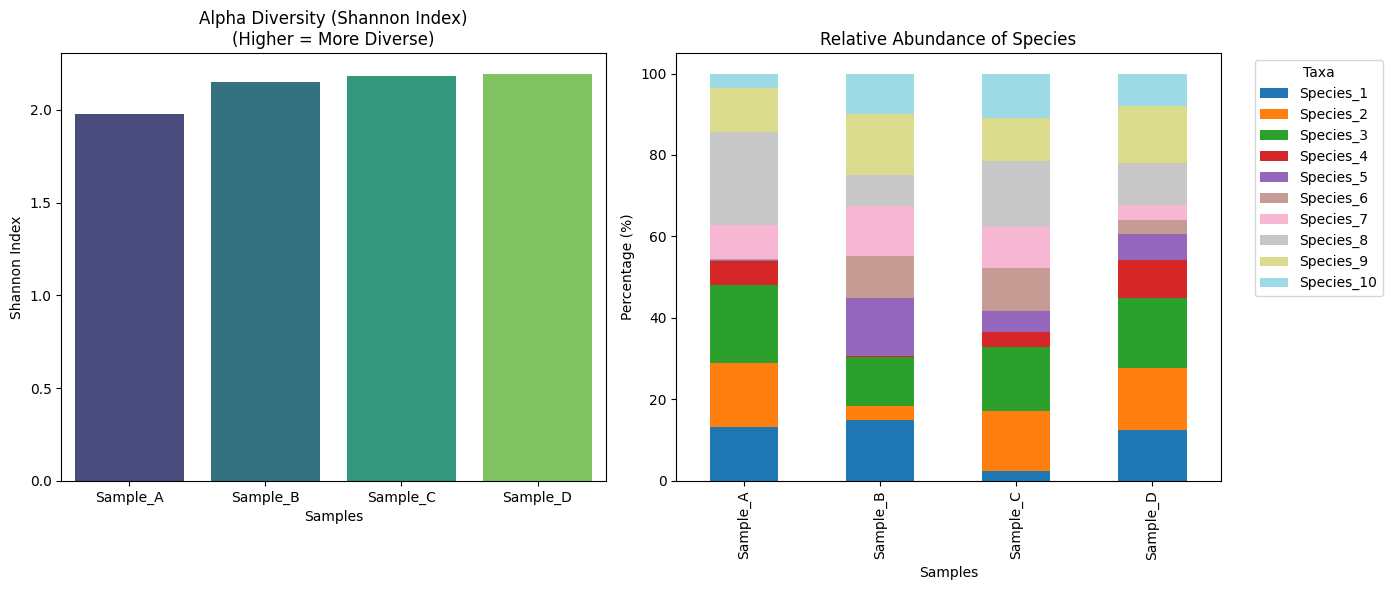

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------------
# 1. Data Simulation (Creating a Mock OTU Table)
# ---------------------------------------------------------
# In a real scenario, this data would come from a CSV file generated
# by a sequencing pipeline (e.g., QIIME2, Mothur).
np.random.seed(42)
taxa = [f"Species_{i}" for i in range(1, 11)]  # 10 different species
samples = ['Sample_A', 'Sample_B', 'Sample_C', 'Sample_D'] # 4 samples

# Generate random counts (reads) for each species in each sample
data = np.random.randint(0, 100, size=(10, 4))
df = pd.DataFrame(data, index=taxa, columns=samples)

print("--- Generated OTU Table (First 5 Rows) ---")
print(df.head())
print("\n")

# ---------------------------------------------------------
# 2. Alpha Diversity Analysis (Shannon Index)
# ---------------------------------------------------------
# Formula: H = -sum(p_i * ln(p_i))
def calculate_shannon_index(counts):
    total = sum(counts)
    if total == 0: return 0
    proportions = counts / total
    # Filter out zeros to avoid log(0) error
    proportions = proportions[proportions > 0]
    return -np.sum(proportions * np.log(proportions))

alpha_diversity = df.apply(calculate_shannon_index)

print("--- Alpha Diversity (Shannon Index) ---")
print(alpha_diversity)
print("\n")

# ---------------------------------------------------------
# 3. Relative Abundance Calculation
# ---------------------------------------------------------
# Normalize raw counts to percentages (sum of column = 100%)
relative_abundance = df.div(df.sum(axis=0), axis=1) * 100

# ---------------------------------------------------------
# 4. Visualization
# ---------------------------------------------------------
plt.figure(figsize=(14, 6))

# Plot 1: Alpha Diversity
plt.subplot(1, 2, 1)
sns.barplot(x=alpha_diversity.index, y=alpha_diversity.values, palette='viridis')
plt.title('Alpha Diversity (Shannon Index)\n(Higher = More Diverse)')
plt.ylabel('Shannon Index')
plt.xlabel('Samples')

# Plot 2: Stacked Bar Chart of Relative Abundance
plt.subplot(1, 2, 2)
# We plot the transpose (.T) so samples are on the X-axis
relative_abundance.T.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='tab20')
plt.title('Relative Abundance of Species')
plt.ylabel('Percentage (%)')
plt.xlabel('Samples')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Taxa")

plt.tight_layout()
plt.show()